<h5> Plotando curva de histerese para cada ângulo (normalizada).</h5>
<p>Este script varre o diretorio onde estão localizados os arquivos .txt contendo as medidas a serem normalizadas obtidas no VSM - e já com o drift ajustado, para quais foram necessários - e plota eles num gráfico Magnetização por Magnetização de Saturação.</p>


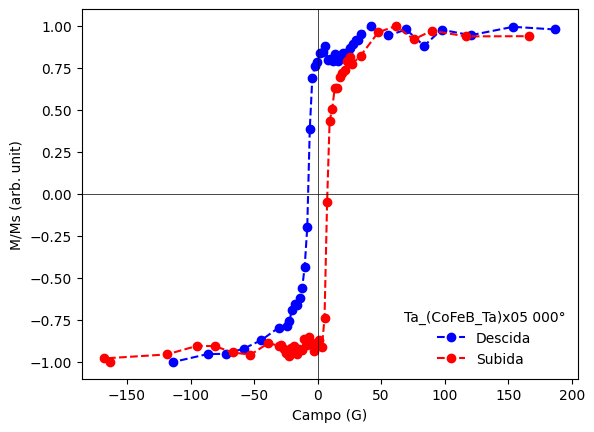

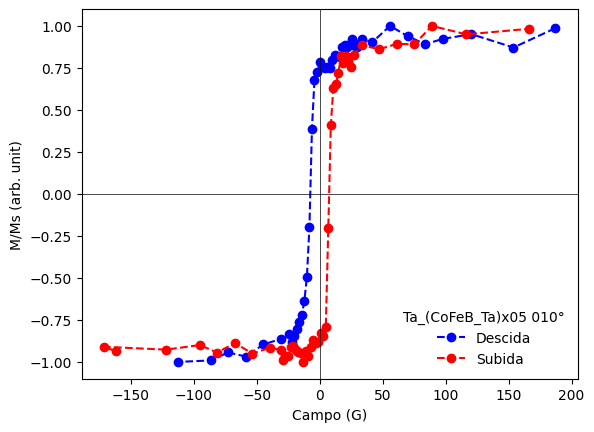

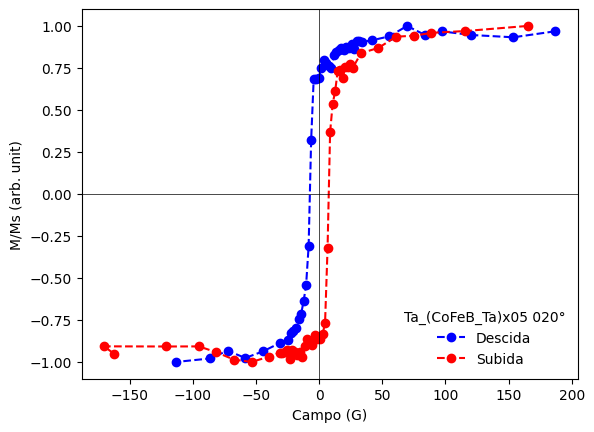

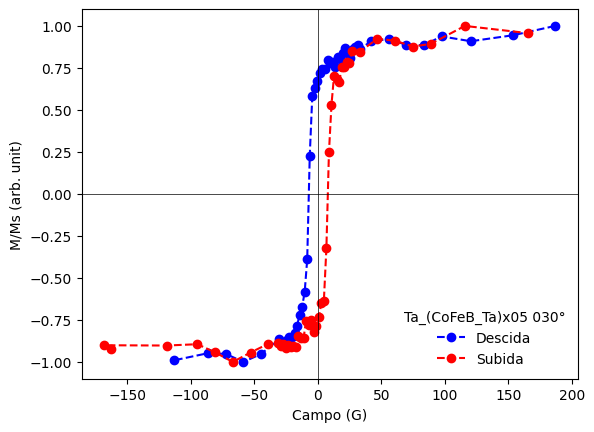

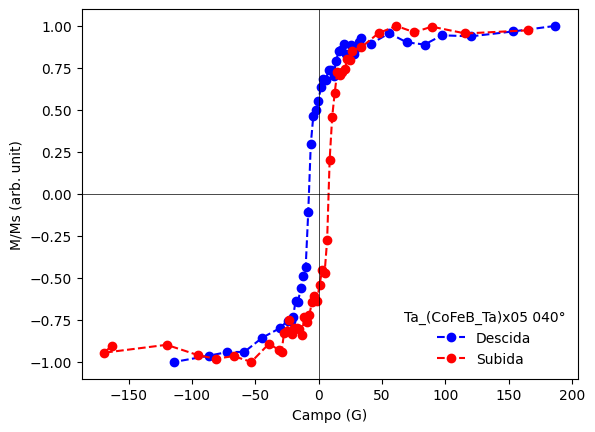

In [4]:
"""
CARREANDO MÓDULOS NECESSÁRIOS
"""

import numpy as np #manipulação de arrays e aplicações matemáticas -CLEIZA #type:ignore 
import matplotlib.pyplot as plt #plot de figuras  -CLEIZA #type: ignore
import os #manipulação de diretórios/arquivos -CLEIZA
from caminhosDosDiretorios import diretorioDeDadosDesteDispositivo as caminhoDirDados, diretorioDeGraficosDesteDispositivo as caminhoDirGraficos #de caminhoDosDiretorios.py, chamamos aqui duas variáveis que guardam respectivamente o caminho do diretório onde estão os arquivos de dados deste dispositivo e o caminho do diretório onde serão salvos os gráficos neste dispositivo -ABQ
from funcoesDeNomeDeArquivo import extrairPartesDoNome, extrair_angulo, nomeConcatenadoDaAmostra #de funcoesDeNomeDeArquivo.py, chamamos aqui funcoes que extraem partes do nome do arquivo -ABQ
from funcoesDeMatrizENormalizacao import funcaoNormalizadora, metadeDoVetor #de funcoesDeMAtrizENormalizacao.py, chamamos uma função que normaliza os dados de um vetor alvo -ABQ

"""
CHAMANDO E RECONHECENDO DADOS
"""

#subdiretorio especifico que este script vai varrer para extrair os dados especificos, neste caso, será "/dadosANormalizar/". -ABQ
subdiretorioDeDadosAVarrer = caminhoDirDados+"dadosCrusMenos12/"

# Lista todos os arquivos na pasta -CLEIZA
arquivos = os.listdir(subdiretorioDeDadosAVarrer)

# Filtra apenas os arquivos .txt -CLEIZA
arquivos_txt = [arquivo for arquivo in arquivos if arquivo.endswith('.txt')]

# Ordena os arquivos pelo ângulo -CLEIZA
#arquivos_txt.sort(key=extrair_angulo)
#PERGUNTA: novamente, por que ordenar os arquivos pelo ângulo? -ABQ

# Itera sobre os arquivos para determinar os limites dos eixos x e y -CLEIZA
for arquivo_txt in arquivos_txt:
    # Caminho completo do arquivo -CLEIZA
    caminho_arquivo = os.path.join(subdiretorioDeDadosAVarrer, arquivo_txt)
    
    # Carrega os dados do arquivo, ignorando 12 linhas -CLEIZA
    dados = np.loadtxt(caminho_arquivo)

    # Extrai os dados de campo e magnetização -CLEIZA
    campo = dados[:, 0]
    magnetizacao = dados[:, 1]

"""
DEFININDO CARACTERÍSTICAS DA FIGURA (OPTATIVO) E APLICAÇÃO DA NORMALIZAÇÃO
"""
"""
# Define o tamanho da figura
fig_size = (10, 8)

# Define o tamanho da fonte dos rótulos dos eixos x e y
fonte_eixos = 14

# Define o tamanho da fonte dos títulos
fonte_titulo = 16

# Define o tamanho dos números nos eixos x e y
tamanho_numeros = 12

# Define o tamanho da fonte da legenda
tamanho_legenda = 12
"""


# Itera novamente sobre os arquivos para criar os gráficos -CLEIZA
for arquivo_txt in arquivos_txt:
    #extrai o nome da amostra do arquivo -ABQ
    nomeDaAmostraEAngulo = f"{nomeConcatenadoDaAmostra(arquivo_txt)} {extrair_angulo(arquivo_txt)}°"

    # Extrai o ângulo do nome do arquivo -CLEIZA
    angulo = extrair_angulo(arquivo_txt)

    # Caminho completo do arquivo -CLEIZA
    caminho_arquivo = os.path.join(subdiretorioDeDadosAVarrer, arquivo_txt)
    
    # Carrega os dados do arquivo, ignorando 12 linhas -CLEIZA
    dados = np.loadtxt(caminho_arquivo)

    # Extrai os dados de campo e magnetização -CLEIZA
    campo = dados[:, 0]
    magnetizacao = dados[:, 1]

    #separando ida e  volta das curvas de magnetizacao -ABQ
    campoDescida = campo[:metadeDoVetor(campo)].copy()
    campoSubida = campo[metadeDoVetor(campo):].copy()
    magnetizacaoDescida = magnetizacao[:metadeDoVetor(magnetizacao)].copy()
    magnetizacaoSubida = magnetizacao[metadeDoVetor(magnetizacao):].copy()
    
    # Normalizando o campo e o momento ao dividir pelo limite dos respectivos eixos -CLEIZA
    magnetizacaoDescidaNormalizada = funcaoNormalizadora(magnetizacaoDescida)
    magnetizacaoSubidaNormalizada = funcaoNormalizadora(magnetizacaoSubida)

    # Cria uma nova figura com tamanho definido (optativo) -CLEIZA
    #plt.figure(figsize=fig_size)

    # Plota a curva de histerese -CLEIZA
    plt.plot(campoDescida, magnetizacaoDescidaNormalizada, "--o", color="blue", label="Descida")
    plt.plot(campoSubida, magnetizacaoSubidaNormalizada, "--o", color="red", label="Subida")
    
    # Adiciona linhas de eixo
    plt.axhline(0, color='black', linewidth=0.5)  # Linha de grade zero para magnetização -CLEIZA
    plt.axvline(0, color='black', linewidth=0.5)  # Linha de grade zero para campo -CLEIZA

    # Adiciona grade ao gráfico (optativo)
    #plt.grid(True, which='both', linestyle='-', color='gray',  linewidth=0.3)
    #plt.grid(True, which='major', axis='both', color='gray', linewidth=0.3)
    
    # Adiciona título e rótulos com tamanho de fonte personalizado -CLEIZA
    plt.xlabel('Campo (G)') #optativamente, adicione aqui o argumento "fontsize=fonte_eixos" -ABQ
    plt.ylabel('M/Ms (arb. unit)') #optativamente, adicione aqui o argumento "fontsize=fonte_eixos" -ABQ
    plt.legend(loc = "lower right", title=f"{nomeDaAmostraEAngulo}", frameon=False) #optativamente, adicione aqui o argumento "fontsize=fonte_titulo" -ABQ
    
    # Define o tamanho dos números nos eixos x e y (optativo)-CLEIZA
    #plt.tick_params(axis='both', which='major', labelsize=tamanho_numeros)
    
    #salva a figura em formato png dentro do diretorio graficosNormalizados, que por sua vez fica no diretorio graficosGerados -ABQ
    os.makedirs(f"{caminhoDirGraficos}/graficosNormalizados", exist_ok=True) #cria o diretório, caso nãa exista (esta linha #existe mais para evitar erros estúpidos de pathing) -ABQ
    plt.savefig(f"{caminhoDirGraficos}/graficosNormalizados/{nomeDaAmostraEAngulo}.png", dpi=300)

    # Exibe o gráfico -CLEIZA
    plt.show()

    #salva os dados normalizados em um arquivo .txt -ABQ
    #os.makedirs(f"{caminhoDirDados}/dadosNormalizados", exist_ok=True) #cria o diretório, caso nãa exista (esta linha existe mais para evitar erros estúpidos de pathing) -ABQ
    #np.savetxt(f"{caminhoDirDados}/dadosNormalizados/{nomeDaAmostraEAngulo}.txt", np.column_stack((campo, magnetizacaoNormalizada)), header="Campo (G) | M/Ms (arb. unit)", comments="")